In [68]:
import numpy as np
import pandas as pd

In [69]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [70]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [71]:
df.shape

(5572, 5)

## 1. Data Cleaning

In [72]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [73]:
#drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [74]:
df.sample(5)

,v1,v2
267,spam,Ur ringtone service has changed! 25 Free credi...
1490,ham,Cant believe i said so many things to you this...
1572,spam,Ur cash-balance is currently 500 pounds - to m...
104,ham,Umma my life and vava umma love you lot dear
8,spam,WINNER!! As a valued network customer you have...


In [75]:
#renaming cols
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)

In [76]:
df.sample(5)

,target,text
2637,ham,No I don't have cancer. Moms making a big deal...
4740,ham,Many more happy returns of the day. I wish you...
3031,ham,Jokin only lar... :-) depends on which phone m...
5004,ham,Guess which pub im in? Im as happy as a pig in...
1043,ham,Mmm thats better now i got a roast down me! iå...


In [77]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [78]:
df['target'] = encoder.fit_transform(df['target'])

In [79]:
df.sample(5)

,target,text
1923,0,Hello. They are going to the village pub at 8 ...
4233,0,Now only i reached home. . . I am very tired n...
2970,0,Height of Confidence: All the Aeronautics prof...
73,0,K..k:)where are you?how did you performed?
1818,0,Am i that much dirty fellow?


In [80]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [81]:
# check for duplicate values
df.duplicated().sum()

403

In [82]:
df = df.drop_duplicates(keep='first')

In [83]:
df.shape

(5169, 2)

## 2. EDA

In [84]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

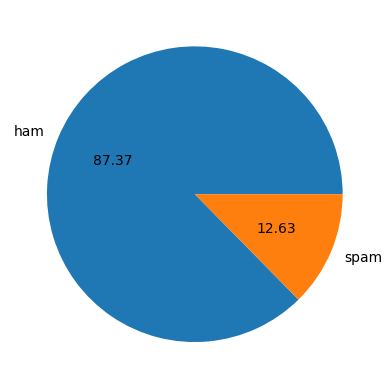

In [85]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')
plt.show()

In [86]:
#!pip install nltk

In [87]:
import nltk

In [88]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sasee\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [89]:
#no. of characters
df['num_characters'] = df['text'].apply(len)

C:\Users\sasee\AppData\Local\Temp\ipykernel_15452\3946155011.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['text'].apply(len)


In [90]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [91]:
# no. of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\sasee\AppData\Local\Temp\ipykernel_15452\3831902479.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [92]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [93]:
# no. of words
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\sasee\AppData\Local\Temp\ipykernel_15452\2398181926.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [94]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [95]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [96]:
#ham msgs
df[df['target']==0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [97]:
#spam msgs
df[df['target']==1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [98]:
!pip install seaborn
import seaborn as sns

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


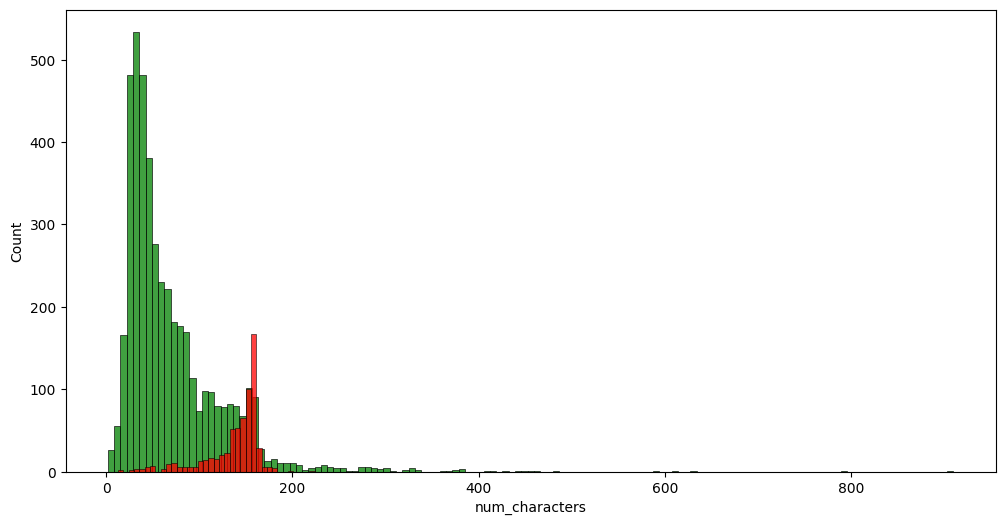

In [99]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'], color='green')
sns.histplot(df[df['target'] == 1]['num_characters'], color='red')
plt.show()

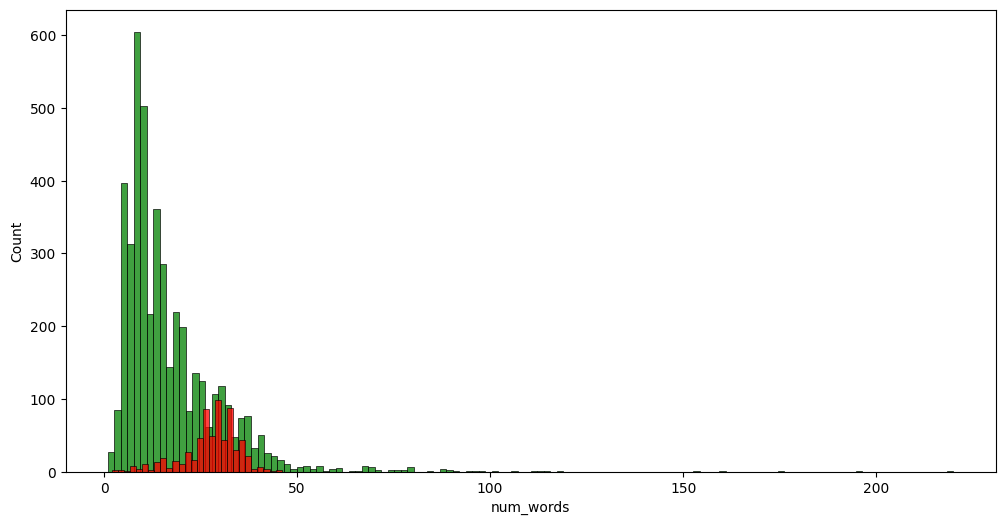

In [100]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'], color='green')
sns.histplot(df[df['target'] == 1]['num_words'], color='red')
plt.show()

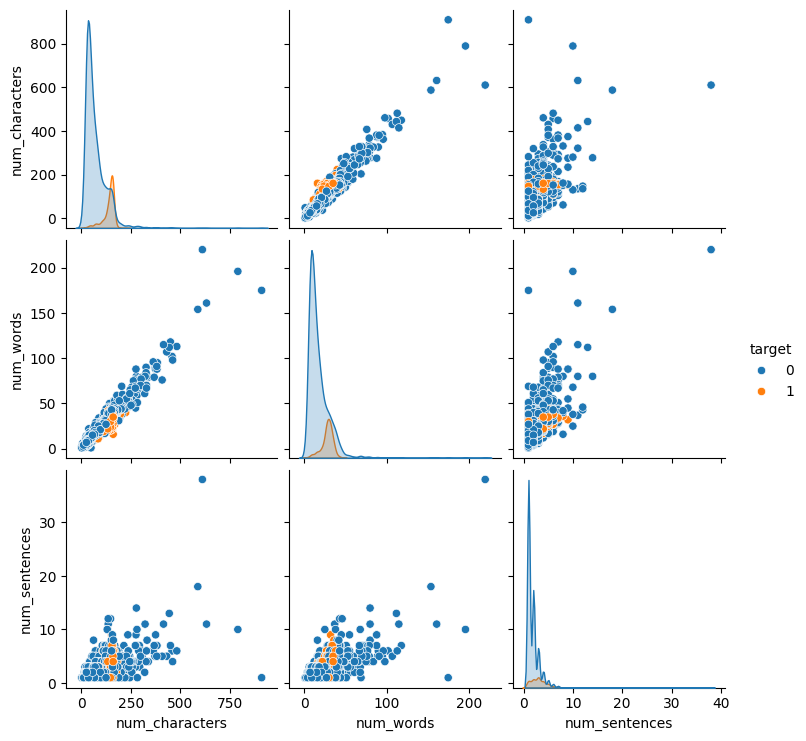

In [101]:
sns.pairplot(df, hue='target')
plt.show()

## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special chars
- Removing stopwords and punctuation
- Stemming

In [102]:
#nltk.download('stopwords')
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [103]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)


In [104]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [105]:
df['transformed_text'] = df['text'].apply(transform_text)

C:\Users\sasee\AppData\Local\Temp\ipykernel_15452\283536690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(transform_text)


In [106]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [107]:
#!pip install wordcloud
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [108]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

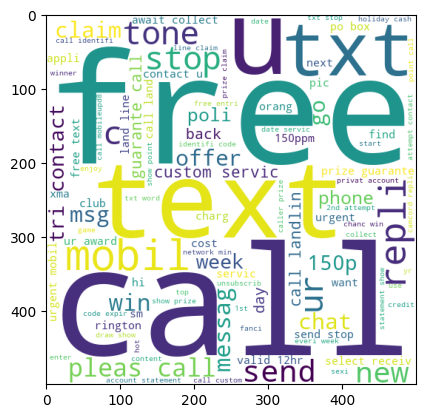

In [109]:
plt.imshow(spam_wc)

In [110]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

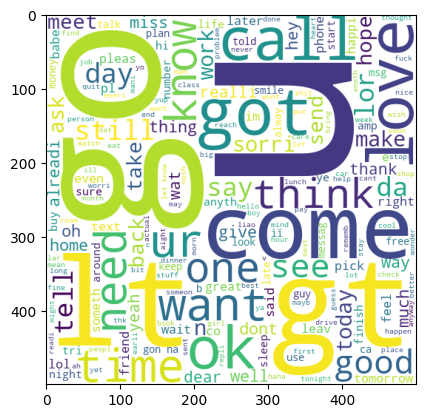

In [111]:
plt.imshow(ham_wc)

In [112]:
spam_corpus=[]
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [113]:
len(spam_corpus)

9939

In [114]:
from collections import Counter
spam_counts = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=["word", "count"])

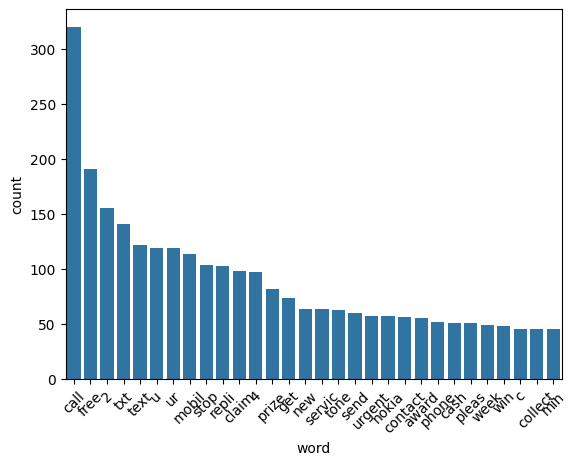

In [115]:
sns.barplot(x="word", y="count", data=spam_counts)
plt.xticks(rotation=45)
plt.show()

In [116]:
ham_corpus=[]
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

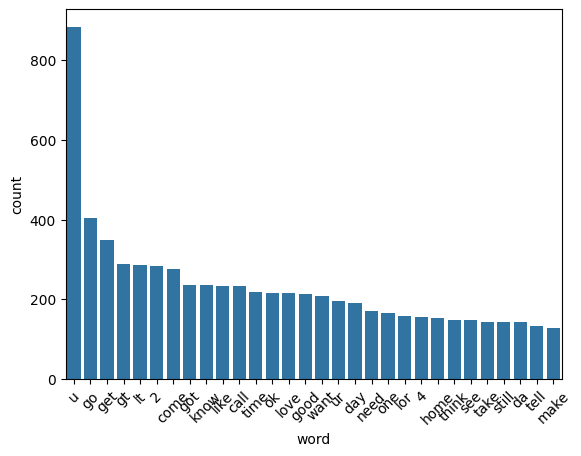

In [117]:
ham_counts = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=["word", "count"])
sns.barplot(x="word", y="count", data=ham_counts)
plt.xticks(rotation=45)
plt.show()

## 4. Model Building

In [118]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [119]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [120]:
X.shape

(5169, 3000)

In [121]:
y = df['target'].values

In [122]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [125]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [126]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [127]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [128]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [129]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [133]:
# Function to classify user input
def classify_message(message):
    # Transform the input message using the fitted TF-IDF vectorizer
    transformed_vector = tfidf.transform([message]).toarray()
    
    # Predict using the trained Bernoulli Naive Bayes model
    prediction = bnb.predict(transformed_vector)
    
    # Return classification result
    return "Spam" if prediction[0] == 0 else "Not Spam"

# Take user input and classify
user_input = input("Enter a message to classify: ")
result = classify_message(user_input)
print(f"The message is classified as: {result}")


Enter a message to classify:  Congratulations! You’ve won a free ticket to Hawaii!


The message is classified as: Spam
